In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
df = pd.read_csv('C:\\Users\\Dell\\Python Project\\Mini Project for ML/Stud1.csv')
df

ID No.    Name College Name     Stream  Year  Percent  Weight
0       1   Ricky        RGCER      Maths  2001       64      50
1       2  Thomas         NYSS   Sacience  2002       84      65
2       3  Taylor         YCCE    English  2003       65      45
3       4  Jordan         PCMC    Physics  2004       98      70
4       5  Robert         ABCD  Chemistry  2005       65      54
5       6    Alex         PQRS         IT  2006       80      62

In [130]:
df.head()

ID No.    Name College Name     Stream  Year  Percent  Weight
0       1   Ricky        RGCER      Maths  2001       64      50
1       2  Thomas         NYSS   Sacience  2002       84      65
2       3  Taylor         YCCE    English  2003       65      45
3       4  Jordan         PCMC    Physics  2004       98      70
4       5  Robert         ABCD  Chemistry  2005       65      54

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID No.        6 non-null      int64 
 1   Name          6 non-null      object
 2   College Name  6 non-null      object
 3   Stream        6 non-null      object
 4   Year          6 non-null      int64 
 5   Percent       6 non-null      int64 
 6   Weight        6 non-null      int64 
dtypes: int64(4), object(3)
memory usage: 468.0+ bytes


In [132]:
df.describe()

ID No.         Year    Percent     Weight
count  6.000000     6.000000   6.000000   6.000000
mean   3.500000  2003.500000  76.000000  57.666667
std    1.870829     1.870829  13.784049   9.563821
min    1.000000  2001.000000  64.000000  45.000000
25%    2.250000  2002.250000  65.000000  51.000000
50%    3.500000  2003.500000  72.500000  58.000000
75%    4.750000  2004.750000  83.000000  64.250000
max    6.000000  2006.000000  98.000000  70.000000

In [133]:
df.describe(include='object')

Name College Name Stream
count       6            6      6
unique      6            6      6
top     Ricky        RGCER  Maths
freq        1            1      1

In [134]:
df.isnull().sum()

ID No.          0
Name            0
College Name    0
Stream          0
Year            0
Percent         0
Weight          0
dtype: int64

In [136]:
df['Year'].value_counts()

2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
Name: Year, dtype: int64

<Axes: xlabel='Percent', ylabel='count'>

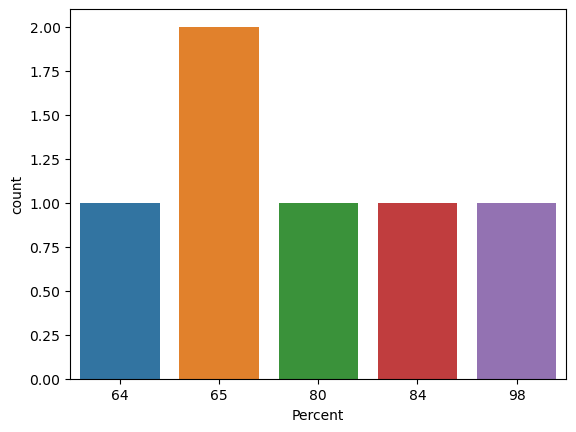

In [137]:
sns.countplot(x = 'Percent' ,data = df)

<Axes: xlabel='Percent', ylabel='Weight'>

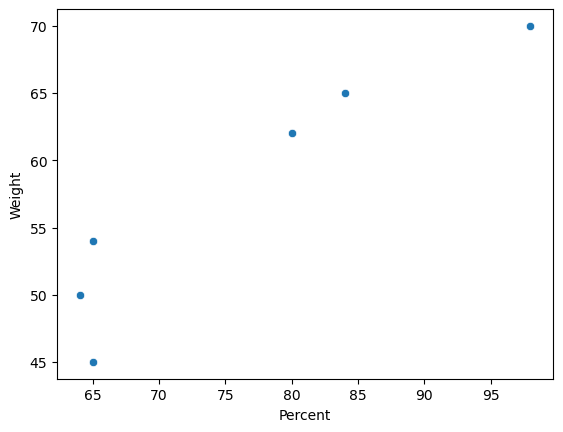

In [138]:
sns.scatterplot(x = df['Percent'] , y = df['Weight'])

In [139]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15028\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


ID No.      Year   Percent    Weight
ID No.   1.000000  1.000000  0.217159  0.290628
Year     1.000000  1.000000  0.217159  0.290628
Percent  0.217159  0.217159  1.000000  0.939101
Weight   0.290628  0.290628  0.939101  1.000000

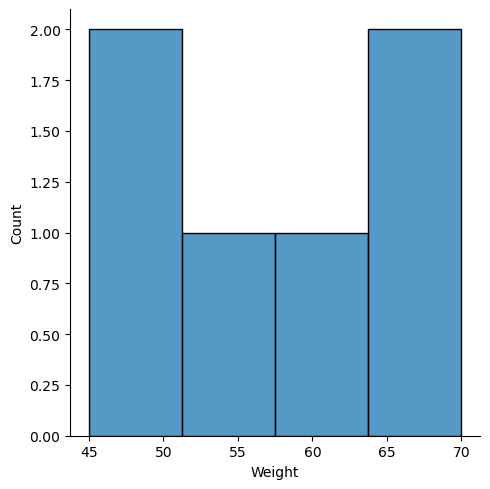

In [140]:
sns.displot(df['Weight'] ,kind = 'hist')

In [141]:
df['Percent'].skew()

0.7828270568292347

<Axes: >

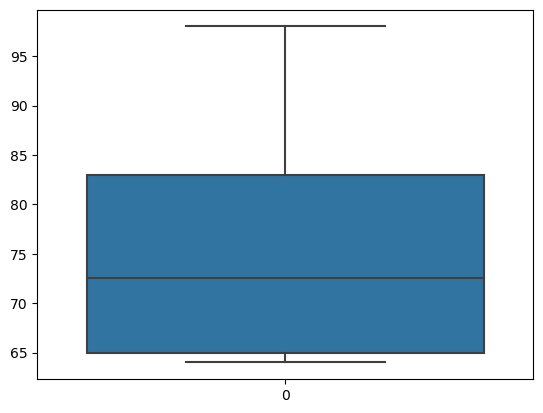

In [142]:
sns.boxplot(df['Percent'])

In [143]:
X = df['Weight']
X

0    50
1    65
2    45
3    70
4    54
5    62
Name: Weight, dtype: int64

In [145]:
y = df['Percent']
y

0    64
1    84
2    65
3    98
4    65
5    80
Name: Percent, dtype: int64

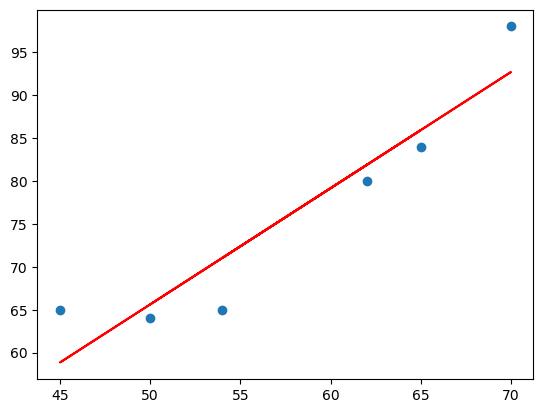

In [146]:
plt.scatter(X,y)
m,b = np.polyfit(X, y, 1)
plt.plot(X ,m*X + b ,'r')

In [147]:
df.select_dtypes(include =[np.number]).columns.tolist()

['ID No.', 'Year', 'Percent', 'Weight']

In [148]:
df.select_dtypes(include =['object']).columns.tolist()

['Name', 'College Name', 'Stream']

In [158]:
df_dummies = pd.get_dummies(df['Name'])
df_dummies

Alex  Jordan  Ricky  Robert  Taylor  Thomas
0     0       0      1       0       0       0
1     0       0      0       0       0       1
2     0       0      0       0       1       0
3     0       1      0       0       0       0
4     0       0      0       1       0       0
5     1       0      0       0       0       0

In [159]:
df_dummies.tail(3)

Alex  Jordan  Ricky  Robert  Taylor  Thomas
3     0       1      0       0       0       0
4     0       0      0       1       0       0
5     1       0      0       0       0       0

In [160]:
df_num = df[['Percent' , 'Year']]
df_num

Percent  Year
0       64  2001
1       84  2002
2       65  2003
3       98  2004
4       65  2005
5       80  2006

In [161]:
df_combine = pd.concat([df_num , df_dummies] ,axis = 1)
df_combine

Percent  Year  Alex  Jordan  Ricky  Robert  Taylor  Thomas
0       64  2001     0       0      1       0       0       0
1       84  2002     0       0      0       0       0       1
2       65  2003     0       0      0       0       1       0
3       98  2004     0       1      0       0       0       0
4       65  2005     0       0      0       1       0       0
5       80  2006     1       0      0       0       0       0

In [162]:
df_combine.head()

Percent  Year  Alex  Jordan  Ricky  Robert  Taylor  Thomas
0       64  2001     0       0      1       0       0       0
1       84  2002     0       0      0       0       0       1
2       65  2003     0       0      0       0       1       0
3       98  2004     0       1      0       0       0       0
4       65  2005     0       0      0       1       0       0

In [163]:
df_combine.isnull().sum(axis = 0)

Percent    0
Year       0
Alex       0
Jordan     0
Ricky      0
Robert     0
Taylor     0
Thomas     0
dtype: int64

In [165]:
X = df_combine.drop('Percent', axis= 1)
X

Year  Alex  Jordan  Ricky  Robert  Taylor  Thomas
0  2001     0       0      1       0       0       0
1  2002     0       0      0       0       0       1
2  2003     0       0      0       0       1       0
3  2004     0       1      0       0       0       0
4  2005     0       0      0       1       0       0
5  2006     1       0      0       0       0       0

In [166]:
y = df_combine['Percent']
y

0    64
1    84
2    65
3    98
4    65
5    80
Name: Percent, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7 , random_state = 12)
X_train.shape ,y_train.shape , X_test.shape, y_test.shape

((4, 7), (4,), (2, 7), (2,))

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lr = LinearRegression()
lr

LinearRegression()

In [170]:
lr.fit(X_train,y_train)

LinearRegression()

In [173]:
print(lr.intercept_)

-1716.4871794871851


In [175]:
print(lr.coef_)

[  0.8974359   -3.76923077  16.02564103   0.           0.
 -16.07692308   3.82051282]


In [177]:
coeff_df = pd.DataFrame(lr.coef_, X_test.columns,columns = ['Coefficient'])
coeff_df

Coefficient
Year       0.897436
Alex      -3.769231
Jordan    16.025641
Ricky      0.000000
Robert     0.000000
Taylor   -16.076923
Thomas     3.820513

<Axes: xlabel='Year', ylabel='Percent'>

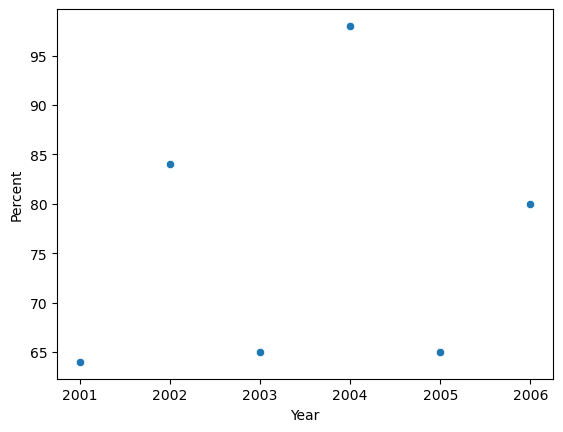

In [181]:
sns.scatterplot(x = df_combine['Year'], y = df_combine['Percent'])

In [183]:
y_predict = lr.predict(X_test)
print(y_predict)

[79.28205128 82.87179487]


In [186]:
from sklearn.metrics import mean_squared_error ,r2_score
mse = mean_squared_error(y_test , y_predict)
r_squared = r2_score(y_test , y_predict)
r_squared

-1104.8842866535201

In [187]:
from math import sqrt
rmse = sqrt(mse)
print("Mean Squared Error : " ,mse)
print("Root Mean Squared Error : ", rmse)
print("Root Squared Value :",r_squared)

Mean Squared Error :  276.47107166338003
Root Mean Squared Error :  16.627419272496258
Root Squared Value : -1104.8842866535201


In [190]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df1

Actual  Predicted
0      64  79.282051
4      65  82.871795